## Import modules


In [1]:
from data_access.firebase_fhir_data_access import *
from data_flattening.fhir_data_flattener import *
from data_analysis.data_analyzer import *
from data_visualization.data_visualizer import *
from data_export.data_exporter import *

## Define credential files


In [2]:
# Define your Firebase project ID
project_id = 'cs342-2024-example-application' 

# Set your service account credentials for a production project
service_account_key_file = 'cs342-2024-example-application-firebase-adminsdk-z4ske-800739b1af.json'

# Define the collection name where your FHIR observations are stored and the input code if filtering is needed
collection_name = 'users'
subcollection_name = 'HealthKit'
loinc_codes = ['9052-2'] # '9052-2', '55423-8'

## Initialize the FirebaseFHIRAccess class using your Firebase credentials

In [3]:
firebase_access = FirebaseFHIRAccess(service_account_key_file, project_id)
firebase_access.connect()

# Fetch FHIR observations from Firestore
fhir_observations = firebase_access.fetch_data(collection_name, subcollection_name, loinc_codes)

# Flatten the fetched FHIR observations into a FHIRDataFrame
flattened_fhir_dataframe = flatten_fhir_resources(fhir_observations)

## Apply basic processing for convenient data readability

In [4]:
processed_fhir_dataframe = FHIRDataProcessor().process_fhir_data(flattened_fhir_dataframe)
processed_fhir_dataframe.df.tail()

,UserId,EffectiveDateTime,LoincCode,QuantityValue,AppleHealthKitCode,QuantityUnit,QuantityName,Display
347,ys7YzmWeX0tKr1ilsXMiNaiZxGTk,2023-11-20,9052-2,410,HKQuantityTypeIdentifierDietaryEnergyConsumed,kcal,Total daily Dietary Energy Consumed,Calorie intake total
348,ys7YzmWeX0tKr1ilsXMiNaiZxGTk,2023-12-30,9052-2,466,HKQuantityTypeIdentifierDietaryEnergyConsumed,kcal,Total daily Dietary Energy Consumed,Calorie intake total
349,ys7YzmWeX0tKr1ilsXMiNaiZxGTk,2024-01-01,9052-2,19,HKQuantityTypeIdentifierDietaryEnergyConsumed,kcal,Total daily Dietary Energy Consumed,Calorie intake total
350,ys7YzmWeX0tKr1ilsXMiNaiZxGTk,2024-01-10,9052-2,322,HKQuantityTypeIdentifierDietaryEnergyConsumed,kcal,Total daily Dietary Energy Consumed,Calorie intake total
351,ys7YzmWeX0tKr1ilsXMiNaiZxGTk,2024-01-14,9052-2,307,HKQuantityTypeIdentifierDietaryEnergyConsumed,kcal,Total daily Dietary Energy Consumed,Calorie intake total


## Visualize Data

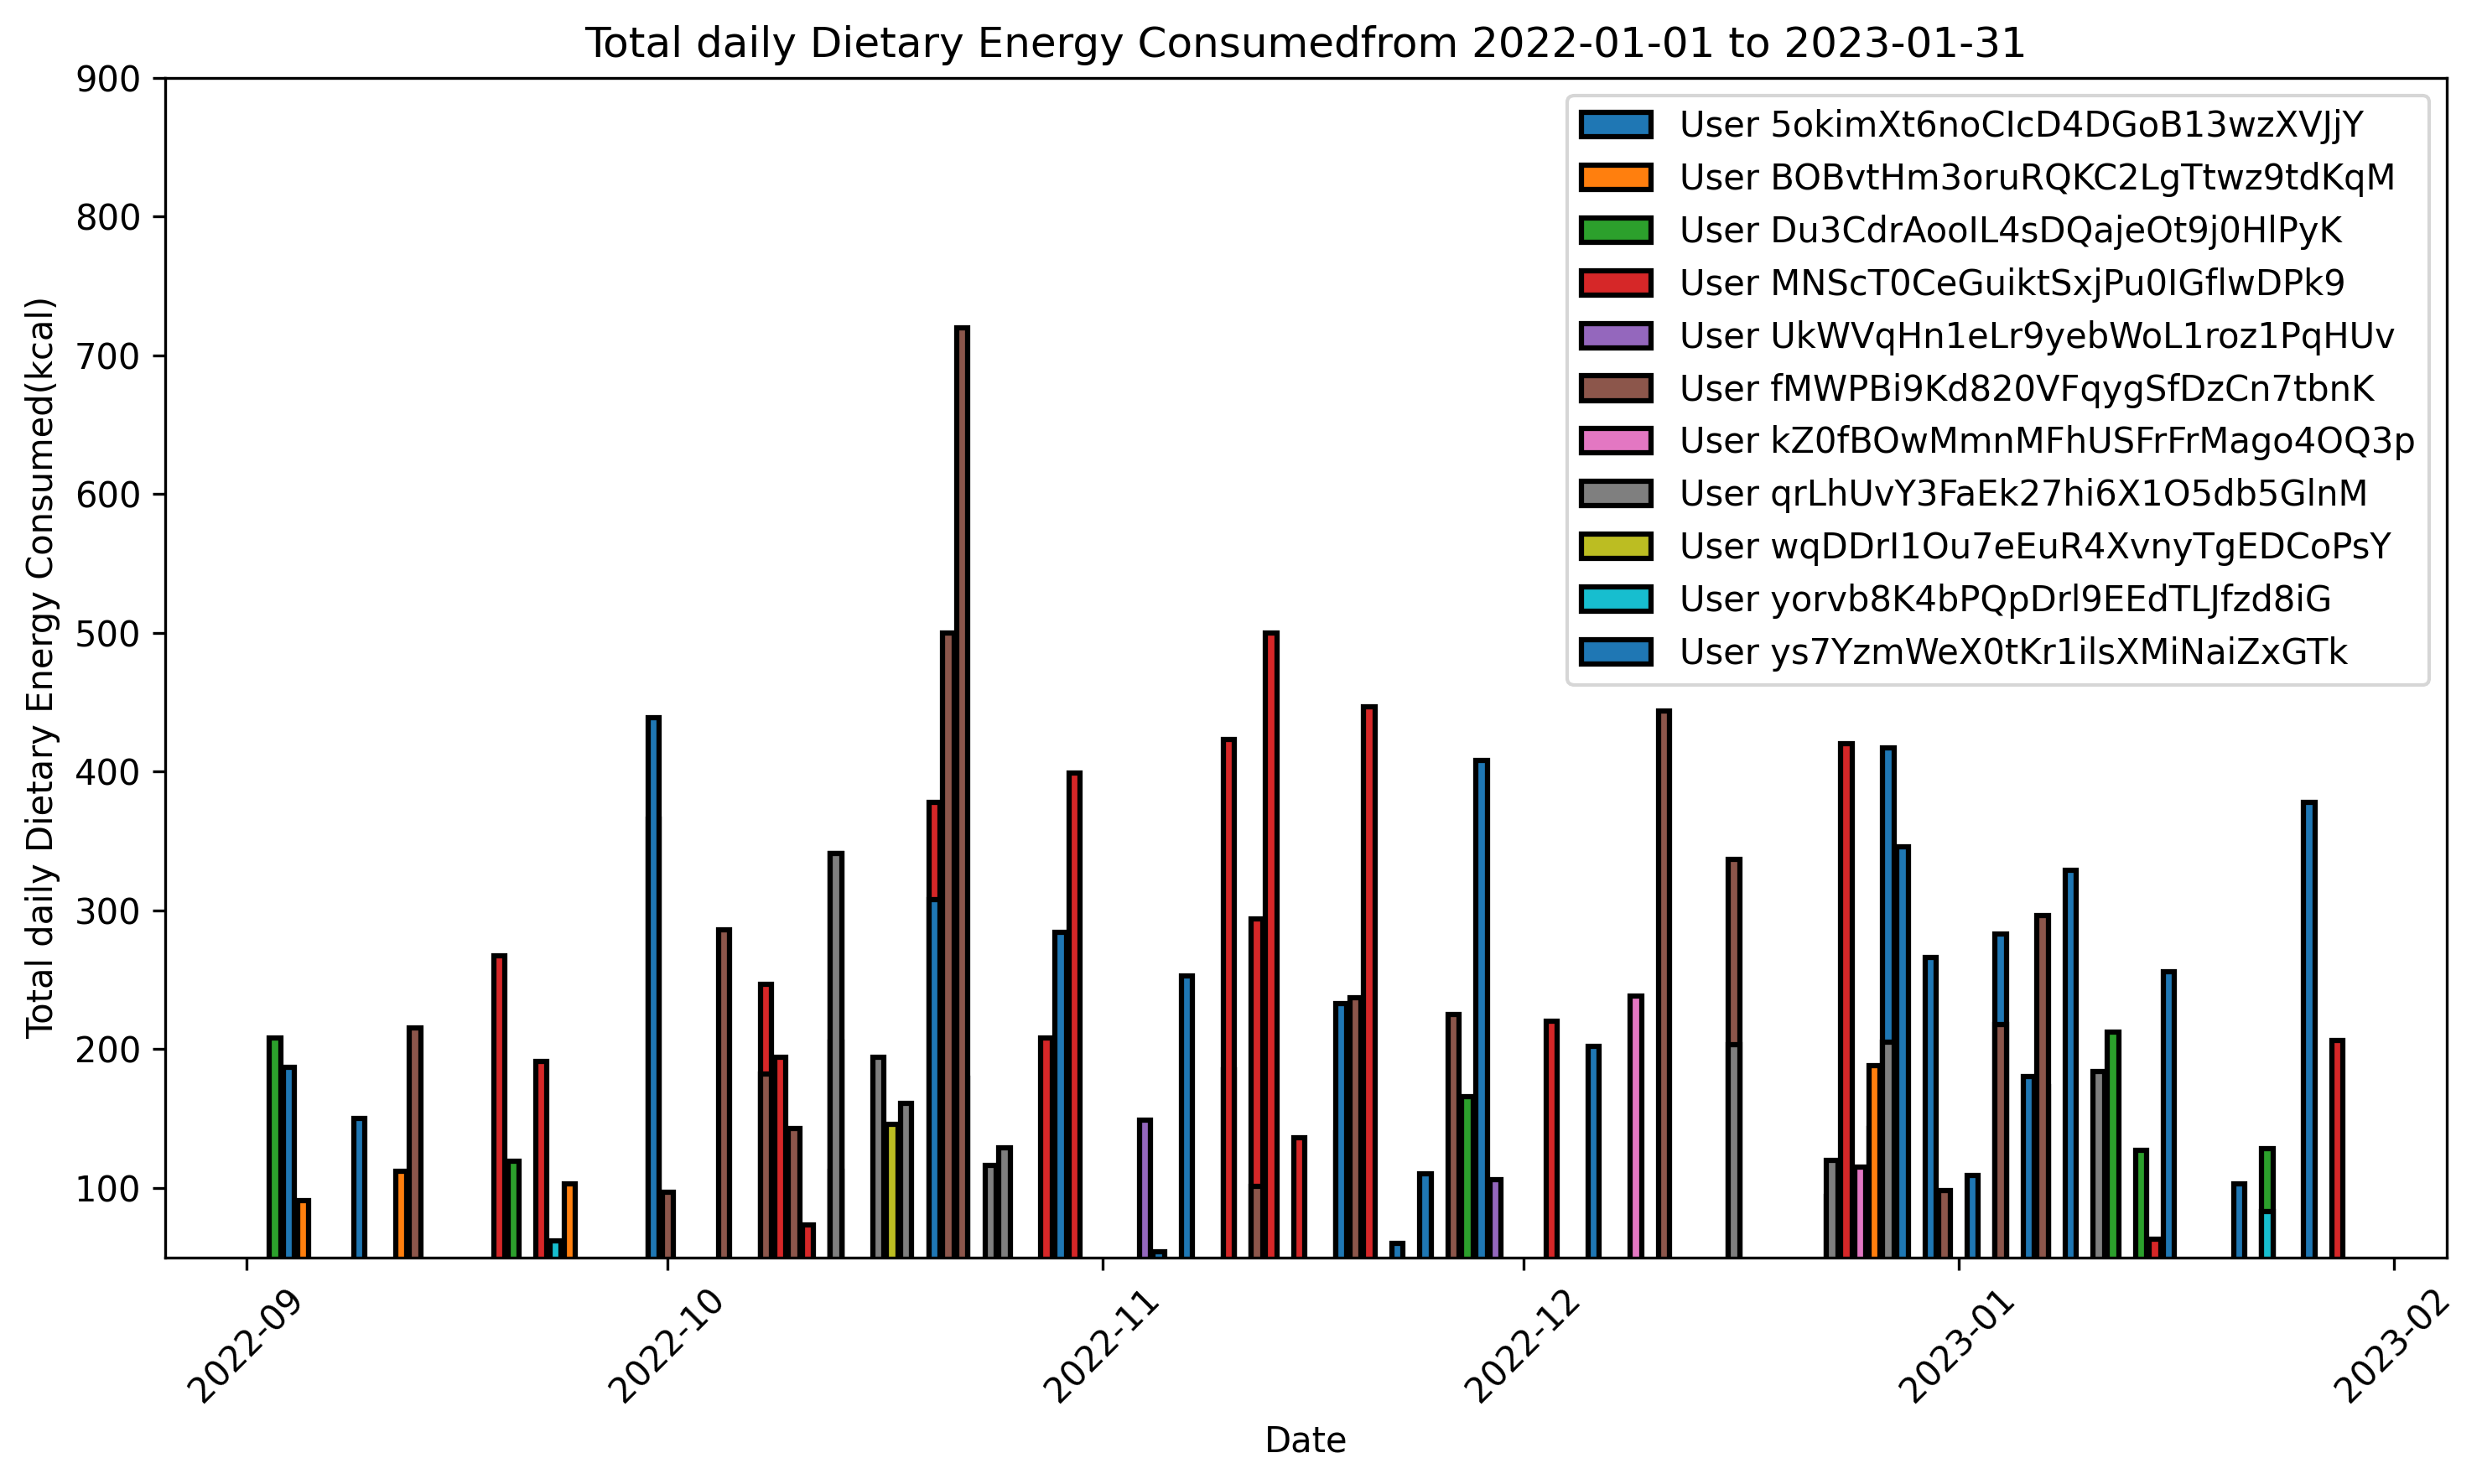

In [5]:
visualizer = DataVisualizer()
# selected_users = ['5okimXt6noCIcD4DGoB13wzXVJjY', 'ys7YzmWeX0tKr1ilsXMiNaiZxGTk']  # Use None to plot data for all users
# visualizer.set_user_ids(selected_users)
visualizer.set_date_range('2022-01-01', '2023-01-31')
visualizer.set_y_bounds(50, 900)

fig = visualizer.create_static_plot(processed_fhir_dataframe)

## Export data

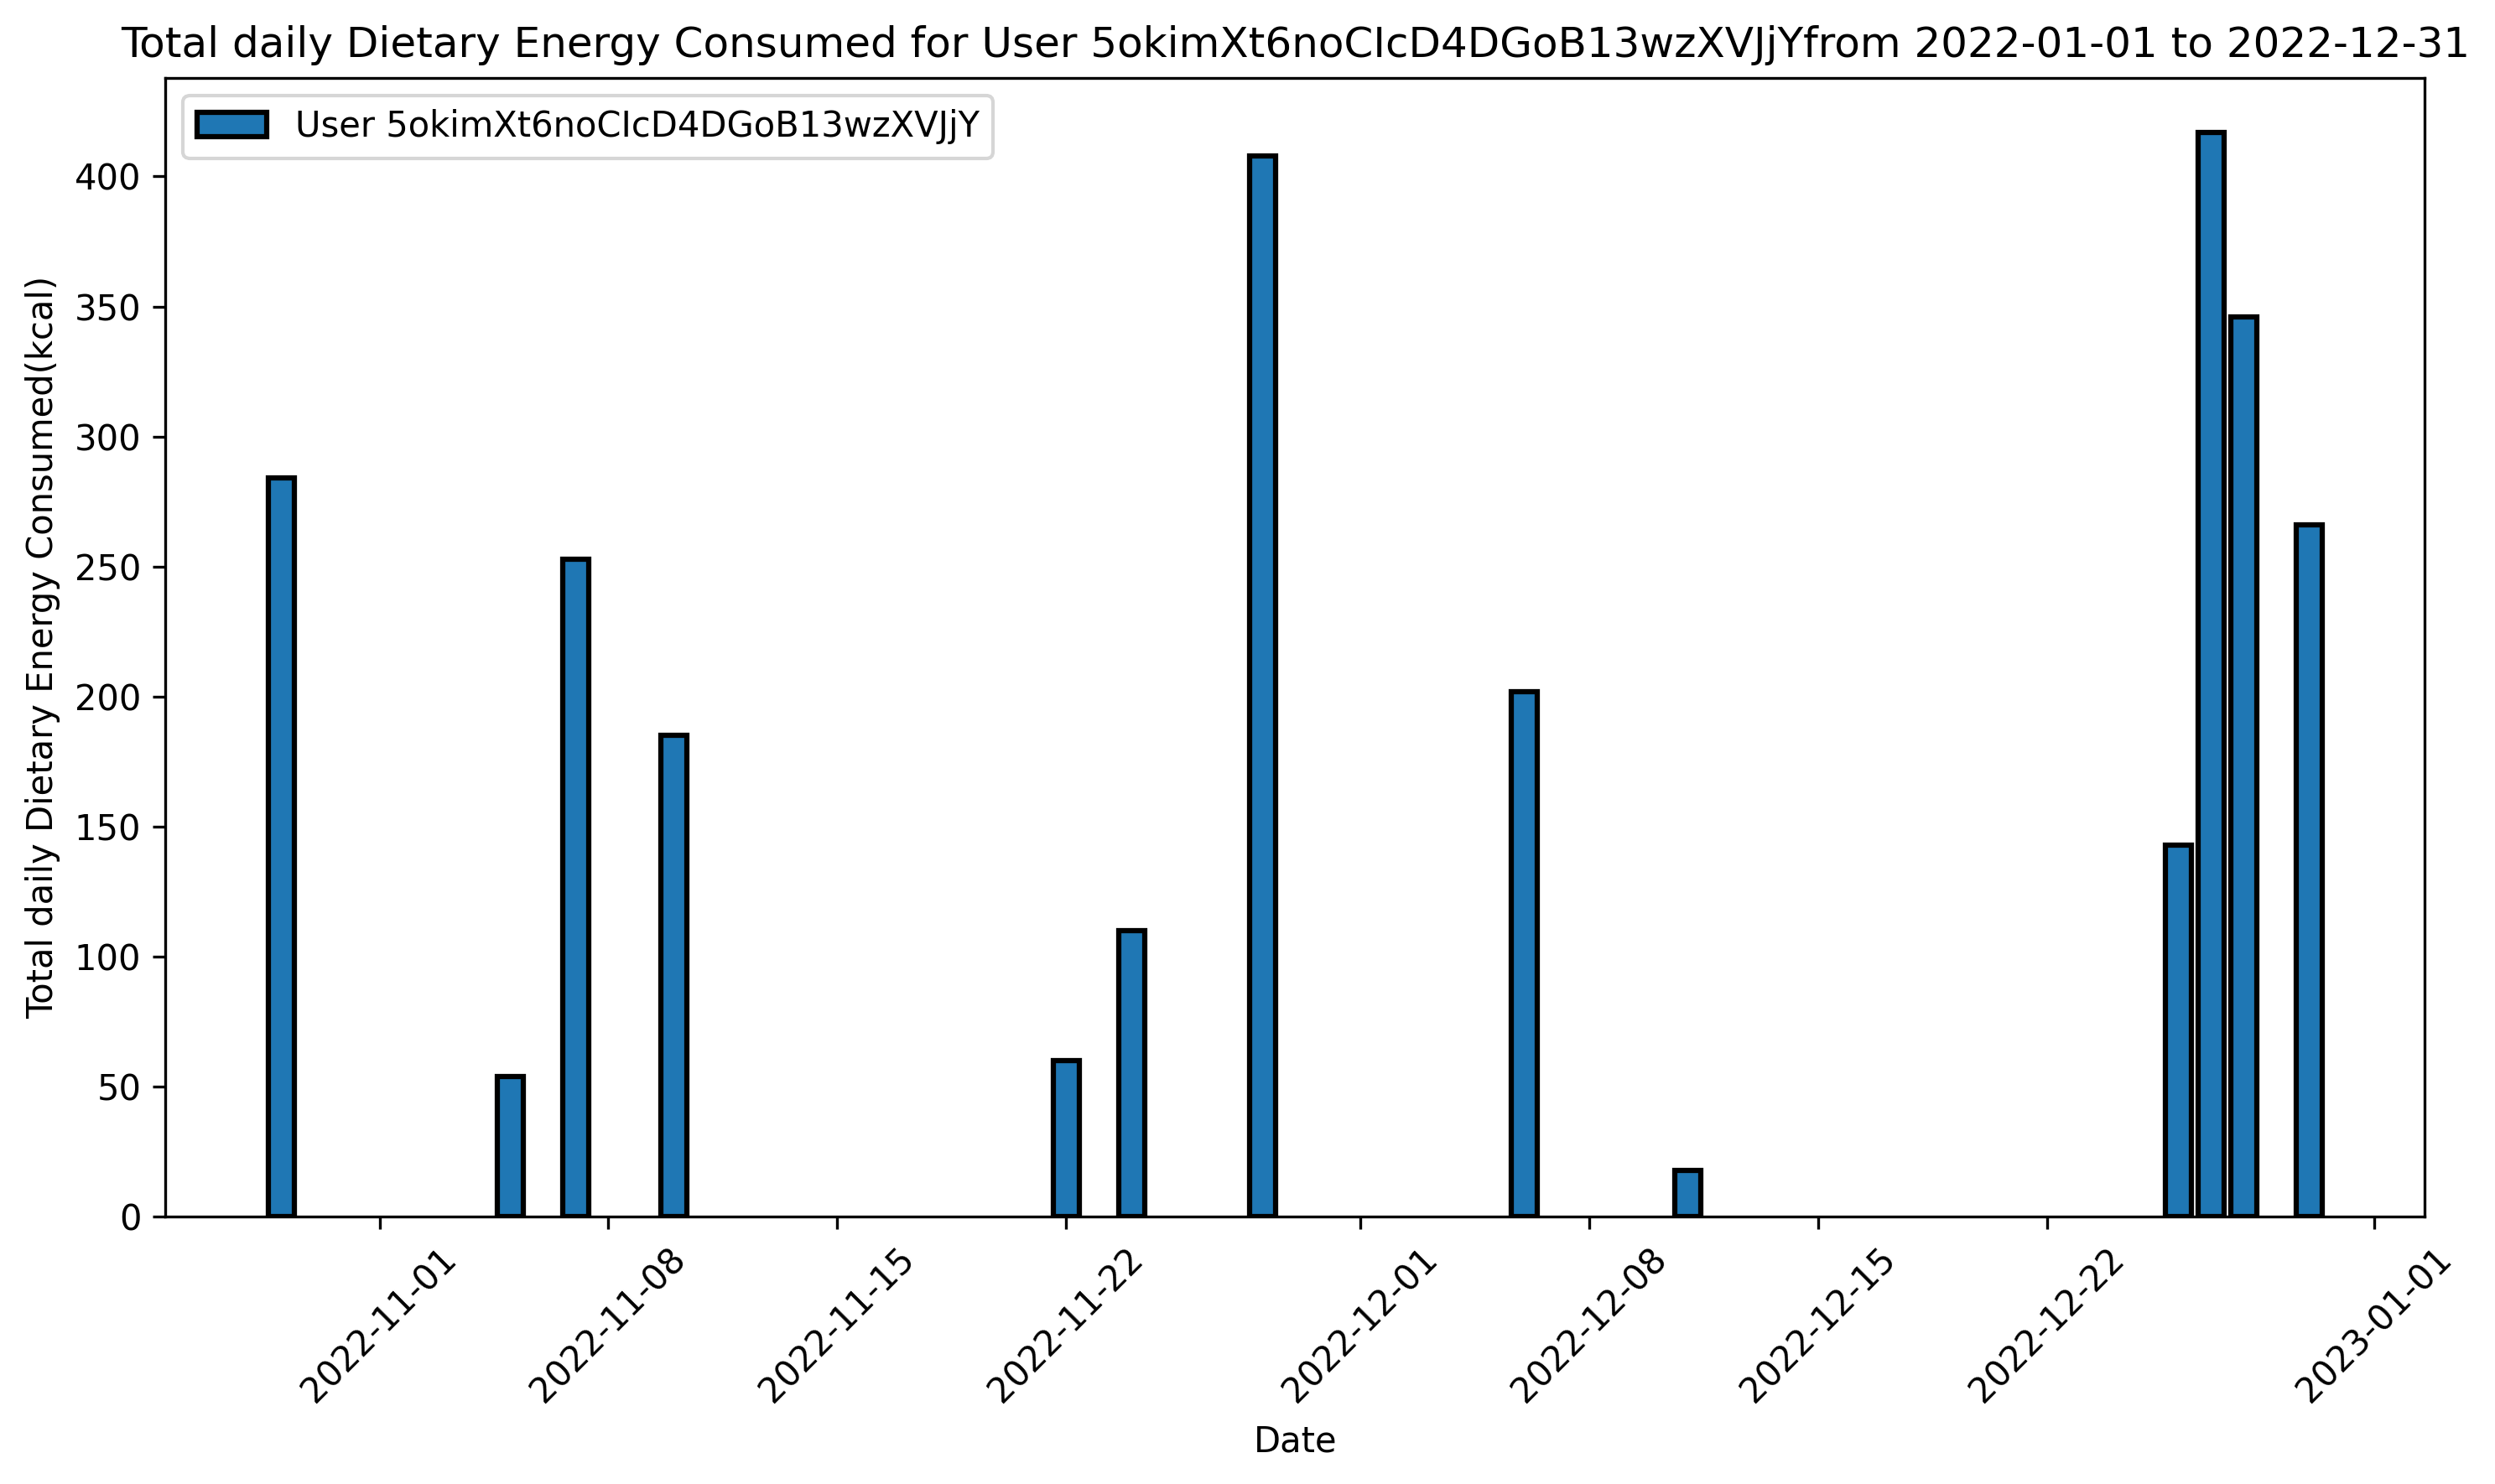

Plot saved successfully.


In [6]:
exporter = DataExporter(processed_fhir_dataframe)
filename = 'data_plot.tif'
selected_users = ['5okimXt6noCIcD4DGoB13wzXVJjY'] 
exporter.set_user_ids(selected_users)
exporter.set_date_range('2022-01-01', '2022-12-31')
exporter.set_y_bounds(50, 700)
exporter.create_and_save_plot(filename)